# A. Import libraries & Dataset

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import plotly.express as px

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# B. EDA

### **Age**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
fig = px.histogram(data_frame= df 
                   , x = 'age'
                   , marginal= 'box'
                   , nbins = (64 - 18) + 1
                   , title = 'Distribution of Age'
                   , height= 400
                   , width = 600)

fig.update_layout(bargap = .1)

fig.show()

Nhận xét:
- Phân phối đồng đều, không có outliers
- Ở hầu hết các nhóm tuổi, SLKH dao động ~50 người. Ngoại trừ 2 nhóm tuổi 18-19 có số lượng khách hàng cao gần x2-3 lần.
- Không có sự chênh lệch quá nhiều trên thực thế thống kê của Statista: https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/. Như vậy dữ liệu có thể phản ánh được số đông dân số

Phân bố tuổi thường là đồng đều (tức là các nhóm tuổi có khả năng xảy ra như nhau) do:
- Động lực dân số: Thường các nhóm tuổi già trẻ tương đương nhau về số lượng
- Thời gian không đổi: Mọi người đều già đi tốc độ như nhau, không có sự lệch lạc về phân bố tuổi trong tự nhiên trong 1 khoảng thời gian ngắn (thiên tai, bão lũ, chiến tranh, dịch bệnh)
- Kích thước mẫu và nhân khẩu học: Mẫu càng lớn, càng đa dạng thì khả năng tuổi xuất hiện càng đồng đều. Tỉ lệ tăng dân số ổn định, tỉ lệ tử vong phân bố đều giữa các nhóm tuổi

#### **Body Mass Index (BMI)**

Dưới đây là ảnh mô tả về chỉ số BMI:
  
<img src="https://cdn-ilafiml.nitrocdn.com/maBPifhrRxUvOlxUBToOapOJXxqlJNDD/assets/images/optimized/rev-67795fb/www.builtlean.com/wp-content/uploads/2013/06/Bmi-chart-1.jpg" alt="BMI Chart" width="400">  

- **Underweight**: BMI < 18.5
- **Normal weight**: BMI từ 18.5 – 24.9
- **Overweight**: BMI từ 25 – 29.9
- **Obesity**: BMI từ 30 - 39.9 
- **Severely obesity**: BMI >= 40


In [6]:
fig = px.histogram(data_frame= df 
                   , x = 'bmi'
                   , marginal= 'box'
                #    , nbins = (64 - 18) + 1
                   , color_discrete_sequence= ['green']
                   , title = 'Distribution of BMI'
                   , height= 400
                   , width = 600)

fig.update_layout(bargap = .1)

fig.show()

Nhận xét:
- BMI dường như phân phối Gauss với giá trị ở giữa đạt khoảng 30. Hơi skew phải với 1 vài điểm outliers 

BMI thường có xu hướng phân phối chuẩn: 
- Định lý giới hạn trung tâm: BMI ảnh hưởng bởi rất nhiều yếu tố độc lập như di truyền, ăn uống, lối sống, trao đổi chất ... Theo định lý này, khi có càng nhiều yếu tố tác động lên 1 kết quả, thì kết quả đó có xu hướng phân phối chuẩn 
- Biến thiên tự nhiên: Đa phần con người nằm quanh giá trị BMI trung bình do các tính chất về di truyền phổ biến, lối sống thông thường. BMI tiêu cực (quá cao/thấp) ít phổ biến hơn
- Giới hạn sinh học: Các giới hạn sinh học của con người khiến chỉ số BMI có những giới hạn nhất định, đây là 1 thước đo tuyến tính. Vì vậy, các BMI quá cao/thấp hiếm gặp hơn

### **Charges**

In [7]:
fig = px.histogram(data_frame= df
                   , x='charges'
                   , marginal='box'
                   , color='smoker'
                   , color_discrete_sequence=['green', 'grey']
                   , title='Annual Medical Charges'
                   , height = 400
                   , width = 600)
fig.update_layout(bargap=0.1)
fig.show()

Nhận xét:
- Với những khách hàng không hút thuốc, phí charge đa phần ở mức khoảng 10000$, chỉ có 1 số ít vượt mốc 20000$. Khả năng cao đây là những người gặp 1 vấn đề lớn về sức khỏe
- Những khách hàng hút thuốc có xu hướng bị charge cao hơn từ 2-4 lần so với người không hút thuốc. Điều này là do tiềm năng rủi ro của những người hút thuốc sẽ mắc các bệnh nặng hơn thông thường, tốn nhiều chi phí hơn, chi phí bảo hiểm cũng cao hơn. Có thể đọc thêm [tại đây](https://www.thehastingscenter.org/charging-smokers-higher-health-insurance-rates-is-it-ethical/#:~:text=Charging%20people%20rates%20based%20on,for%20the%20risks%20they%20take.).

### **Smoker**

In [8]:
px.histogram(df, x='smoker', color='sex', title='Smoker', width=600, height = 400)

Nhận xét: 
- Phân phối về giới tính của từng loại khách hàng tương đối cân bằng, không bị bias về 1 giới tính nào cả và đi theo xu hướng chung của tệp dataset

### **Age vs Charges**

In [9]:
fig = px.scatter(df
                 ,x='age'
                 ,y='charges'
                 ,color='smoker' 
                 ,opacity=0.8
                 ,hover_data=['sex'] 
                 ,title='Age vs. Charges'
                 ,width= 600
                 ,height=500)
fig.update_traces(marker_size=5)
fig.show()

Nhận xét:
- Age và Charges có quan hệ tuyến tính với nhau như mong đợi, khi Age tăng thì Charges cũng tăng
- Nhìn chung có thể nhận thấy 3 nhóm: 
    + Nhóm **Không hút thuốc**: Nhóm nhóm có 1 số outlier hơi phi tuyến tính, có thể đây là 1 số ca đặc biệt như đã nhận định phía trên
    + Nhóm **Có hút thuốc, chi phí cao**: Có thể nhóm này cũng bị béo phì (BMI >= 30), cần đào sâu hơn
    + Nhóm **Có hút thuốc, chi phí thấp**: Ngược lại, có thể đây là nhóm không bị béo phì

In [10]:
fig = px.scatter(df
                 ,x='age'
                 ,y='charges'
                 ,color='smoker' 
                 ,opacity=0.8
                 ,hover_data=['sex'] 
                 ,title='Age vs. Charges'
                 ,width= 600
                 ,height=500)
fig.update_traces(marker_size=5)
fig.show()

### **BMI vs Charges**

In [11]:
fig = px.scatter(df
                 ,x='bmi'
                 ,y='charges'
                 ,color='smoker' 
                 ,opacity=0.8
                 ,hover_data=['sex'] 
                 ,title='Age vs. Charges'
                 ,width= 600
                 ,height=500)
fig.update_traces(marker_size=5)
fig.show()

Nhận xét:
- Với nhóm không hút thuốc, BMI không có quan hệ tuyến tính với Charges
- Ngược lại, với nhóm hút thuốc thì có. Đặc biệt, với nhóm có BMI >= 30 thì Charges cao hơn rất nhiều. 

### **Correlation**

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
sex_mask = {'female': 0, 'male': 1}
smoker_mask = {'no': 0, 'yes': 1}
df['sex_num'] = df['sex'].map(sex_mask)
df['smoker_num'] = df['smoker'].map(smoker_mask)

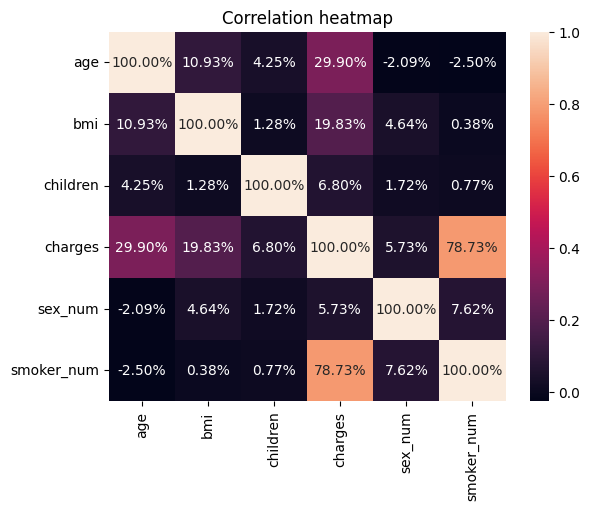

In [14]:
sns.heatmap(df[['age', 'bmi', 'children',  'charges', 'sex_num', 'smoker_num']].corr()
            , annot=True
            , fmt = '.2%')

plt.title('Correlation heatmap')
plt.show()

Đây là cách mà hệ số tương quan có thể được diễn giải ([nguồn](https://statisticsbyjim.com/basics/correlations)):

* **Độ mạnh**: Giá trị tuyệt đối của hệ số tương quan càng lớn, mối quan hệ càng mạnh.

    * Các giá trị cực đoan -1 và 1 biểu thị một mối quan hệ tuyến tính hoàn hảo, trong đó sự thay đổi của một biến số đi kèm với sự thay đổi hoàn toàn nhất quán của biến số khác. Đối với những mối quan hệ này, tất cả các điểm dữ liệu đều nằm trên một đường thẳng. Trong thực tế, bạn sẽ hiếm khi thấy bất kỳ loại mối quan hệ hoàn hảo nào.

    * Hệ số tương quan có giá trị 0 biểu thị không có mối quan hệ tuyến tính. Khi một biến số tăng lên, không có xu hướng của biến số kia tăng hoặc giảm.
    
    * Khi giá trị nằm trong khoảng từ 0 đến +1 hoặc -1, có một mối quan hệ nhưng các điểm không tất cả nằm trên một đường thẳng. Khi r tiến gần đến -1 hoặc 1, độ mạnh của mối quan hệ tăng lên và các điểm dữ liệu có xu hướng nằm gần một đường thẳng hơn.


* **Hướng**: Dấu của hệ số tương quan biểu thị hướng của mối quan hệ.

    * Hệ số dương chỉ ra rằng khi giá trị của một biến số tăng lên, giá trị của biến số kia cũng có xu hướng tăng lên. Mối quan hệ dương tạo ra một đường dốc đi lên trên biểu đồ phân tán.
    
    * Hệ số âm biểu thị rằng khi giá trị của một biến số tăng lên, giá trị của biến số kia có xu hướng giảm xuống. Mối quan hệ âm tạo ra một đường dốc đi xuống trên biểu đồ phân tán.

Đây là cách biểu diễn mối quan hệ tương tự dưới dạng hình ảnh ([nguồn](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://t3.ftcdn.net/jpg/05/42/17/88/360_F_542178820_h0IeMazqluqxGJKHU9ju0wavqjzIvBRZ.jpg" width="360">

Hệ số tương quan có công thức như sau:

<img src="https://i.imgur.com/unapugP.png" width="360">

Tìm hiểu thêm về định nghĩa toán học và diễn giải hình học của tương quan tại đây: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Các dataframe của Pandas cũng cung cấp phương thức `.corr` để tính toán hệ số tương quan giữa tất cả các cặp cột số.


#### Ngụy Biện Tương Quan và Nhân Quả

- **Tương quan** chỉ ra mối liên hệ giữa hai biến. Ví dụ, nếu hai biến có xu hướng thay đổi cùng nhau, chúng có thể có sự tương quan cao. Tuy nhiên, điều này không chứng minh rằng một biến là nguyên nhân của biến kia.

- **Nhân quả** có nghĩa là một biến (nguyên nhân) thực sự gây ra sự thay đổi trong biến khác (kết quả).

#### Các Tình Huống Ngụy Biện

- **X gây ra Y**: Nếu sự thay đổi của X dẫn đến sự thay đổi của Y, thì X là nguyên nhân và Y là kết quả.

- **Y gây ra X**: Nếu sự thay đổi của Y dẫn đến sự thay đổi của X, thì Y là nguyên nhân và X là kết quả.

- **Yếu tố khác Z**: X và Y có thể có mối liên hệ vì chúng cùng bị ảnh hưởng bởi yếu tố khác (Z), không phải vì X gây ra Y hay ngược lại.

- **Mẫu nhỏ**: Nếu số lượng dữ liệu quá ít, mối quan hệ giữa X và Y có thể chỉ là ngẫu nhiên và không phản ánh mối quan hệ thực sự.

#### Lưu Ý Quan Trọng

- Máy tính không thể phân biệt giữa tương quan và nhân quả một cách tự động. Khi đưa ra quyết định dựa trên hệ thống tự động, cần thận trọng để tránh ngụy biện này.

- Việc hiểu đúng mối quan hệ nguyên nhân - kết quả thường đòi hỏi sự phân tích và hiểu biết của con người.


### **Linear Regression**

Do ở phân tích scatter bên trên, Nhóm không hút thuốc có xu hướng hồi quy tuyến tính, các dot fit trên 1 đường line (ngoại trừ 1 số outlier nhất định do tác động bên ngoài) nên sẽ cần lọc riêng

In [15]:
non_smoker_df = df[df['smoker'] == 'no']

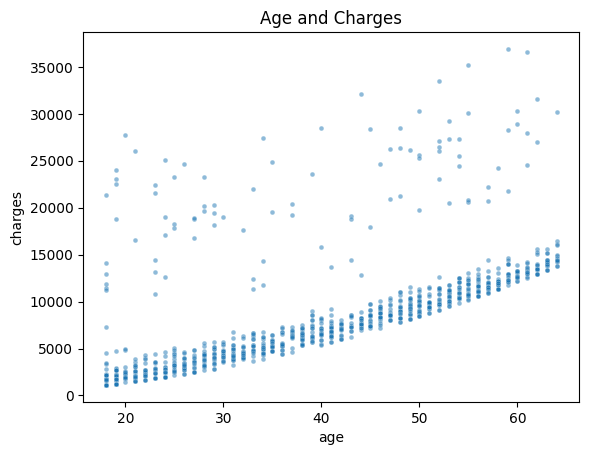

In [16]:
sns.scatterplot(data = non_smoker_df
                , x=  'age'
                , y ='charges'
                , alpha = .5
                , s = 12)

plt.title('Age and Charges')
plt.show()

Phương trình hồi quy tuyến tính đơn biến là:

$y = wx + b$

Đường thẳng được xác định bởi: $w$ (Hệ số góc "slope") and $b$ (hệ số chặn "intercept"). 

### Model

Trong trường hợp nêu trên, y là charge, x là age

$charges = w \times age + b$

Giờ cần tìm $w$ và $b$ để fit vào data tốt nhất. 

* Đây là kĩ thuật _linear regression_, mô hình bên trên gọi là _linear regression model_, vì nó biểu thị mối quan hệ giữa age và charges dưới dạng 1 đường thẳng tuyến tính

* $w$ và $b$ là _parameters_ hoặc _weights_ của model.

* Giá trị của age gọi là _inputs_ và giá trị của charges gọi là _targets_. 

Tiếp theo thử def function `estimate_charges`, để tính toán $charges$, với giá trị $age$, $w$ và $b$.

In [17]:
def estimate_charges(age, w, b):
    return w * age + b

In [18]:
w = 50
b = 100

In [19]:
ages = non_smoker_df['age']
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [20]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

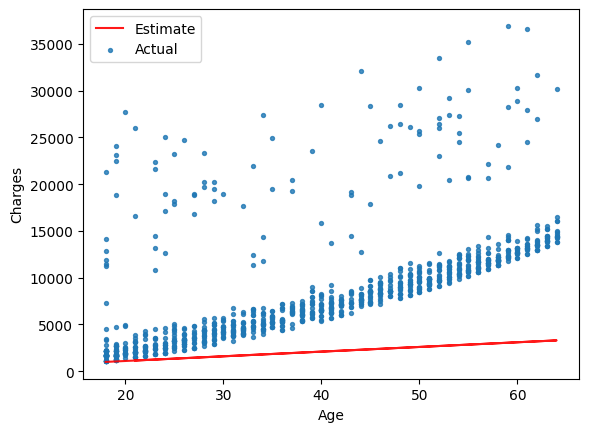

In [21]:
target = non_smoker_df['charges']

plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=8,alpha=0.8)

plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])
plt.show()

Rất rõ ràng là các param w và b phía trên không fit được vào bộ dữ liệu. Vì vậy có thể thử các param khác để dịch chuyển đường line Estimate. Để tiết kiệm thời gian, def luôn 1 hàm bao gồm các step bên trên

In [22]:
def try_parameters(w, b):
    ages = non_smoker_df['age']
    target = non_smoker_df['charges']
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    plt.show()

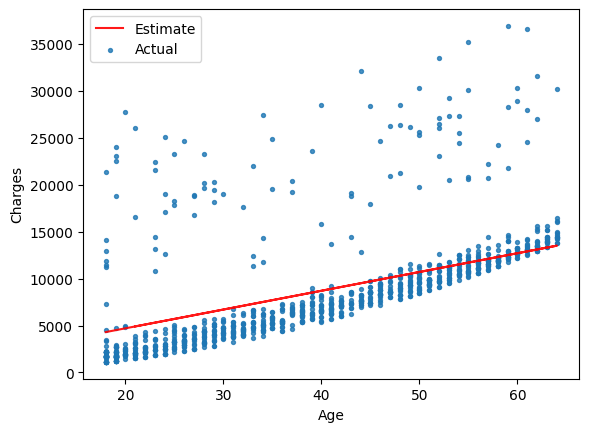

In [23]:
try_parameters(200, 700)

Để tự động hóa công việc ```try_parameter```, tự động để máy chạy nhưng cần phải cho máy biết thế nào là 1 đường thẳng tốt:
- Tính toán đường thẳng đó fit tốt như thế nào?
- Khi chỉ số biểu thị sự "fit tốt" đó được tính, ta phải có 1 cách nào đó để thay đổi $w$ và $b$ để cải thiện sự fit
Vì vậy, giải quyết được các thông tin phía trên thì máy có thể học tốt, đưa ra cụm $w-b$ phù hợp

### Lost/Cost Function
- Tính toán sai lệch giữa targets và preds, chỉ số này là **residual**
- Bình phương resid 
- Lấy average của bình phương resid
- Lấy căn bậc 2 của giá trị phía trên

Chỉ số này là RMSE (Root Mean Square Error). Công thức tính là:

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Mô tả kết quả bằng ảnh: 

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Sau này có thể dùng 
```python
from sklearn.metrics import root_mean_squared_error as rmse
```

hoặc 

```python
from sklearn.metrics import mean_squared_error as mse 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
```

In [24]:
import numpy as np 

In [25]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

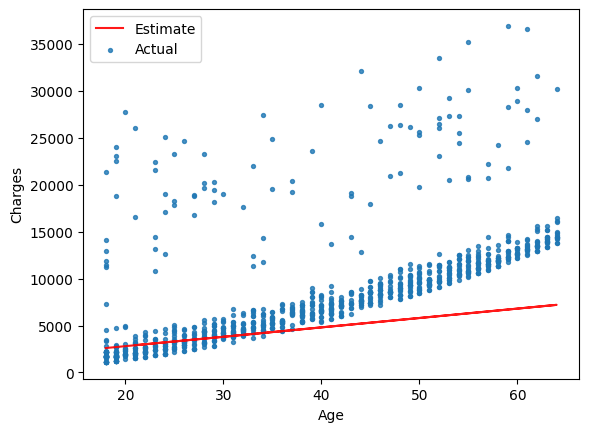

In [26]:
try_parameters(100,800)

In [27]:
tar = non_smoker_df['charges']
pred = estimate_charges(non_smoker_df['age'], 100, 800)
rmse(tar, pred)

6398.458642362903

RMSE ở đây có ý nghĩa: *Trung bình, mỗi điểm giá trị được predict sai khác với giá trị actual khoảng 6398 đơn vị tính (ở đây là $)*

Điều này xác định được sự *Loss* vì nó chỉ ra model tệ khi dự đoán giá trị targets. 

Vì vậy, 1 model ít loss (RMSE thấp) thì càng tốt

Tiếp tục bổ sung vào hàm `try_parameters` để thử các giá trị khác kèm theo tính *Loss*

In [28]:
def try_parameters(w, b):
    ages = non_smoker_df['age']
    target = non_smoker_df['charges']
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

    plt.show()    

RMSE Loss:  5238.67941761584


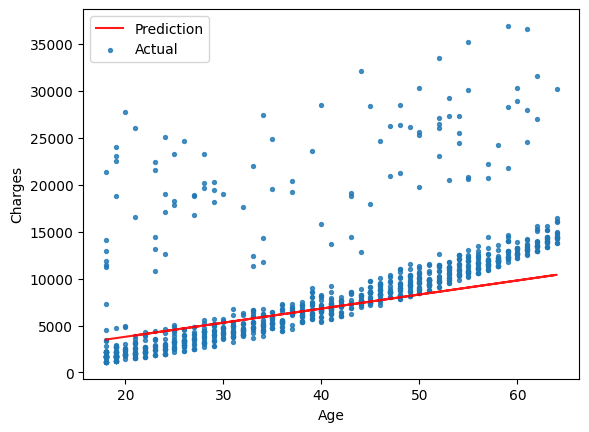

In [29]:
try_parameters(150, 800)

### Optimizer
Sau khi hiểu về RMSE, ta cần phải có những strategy để tinh chỉnh $w$ và $b$ để giảm thiểu *Loss* và tăng mức độ fit của model với tệp dữ liệu
- OLS: tốt cho tệp dataset nhỏ
- Thuật toán Stochastic Gradient Descent (SGD): tốt cho dataset lớn

Video: 
- Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk 
- Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 

Cả 2 kĩ thuật đều hướng tới giảm loss tuy nhiên
- Phương pháp toán học OLS tính toán trực tiếp giá trị tốt nhất cho `w` và `b` sao cho tổng bình phương sai số (RSS - Residual Sum of Square) là nhỏ nhất 
- Phương pháp lặp SGD cập nhật các tham số `w` và `b` của mô hình một cách lặp lại bằng cách sử dụng gradient của hàm mất mát. Mỗi lần lặp, nó chỉ sử dụng một mẫu hoặc một nhóm nhỏ mẫu (mini-batch) từ tập dữ liệu.

### Thử nghiệm model Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [32]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



** NOTES **: 
- `X` phải là `2D-array` nên inputs sẽ là 1 `dataframe`

- Còn targets `y` là `array`

In [33]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']
print('inputs shape:', inputs.shape)
print('targets shape:', targets.shape)

inputs shape: (1064, 1)
targets shape: (1064,)


In [34]:
model.fit(inputs, targets)

LinearRegression()

In [35]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [36]:
rmse(targets, predictions)

4662.505766636395

In [37]:
#Tìm slope w
model.coef_

array([267.24891283])

In [38]:
#Tìm intercept b
model.intercept_

-2091.4205565650864

RMSE Loss:  4662.505766636395


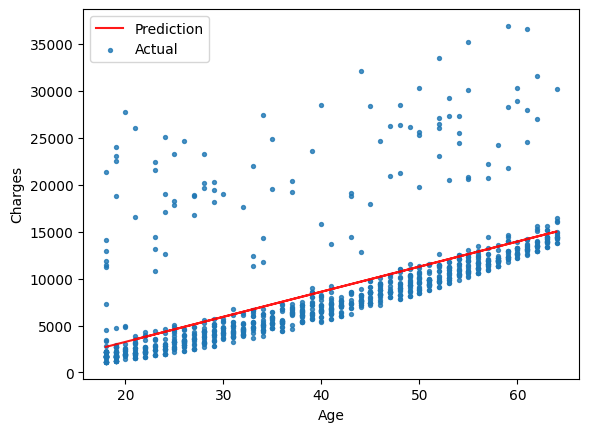

In [39]:
try_parameters(model.coef_, model.intercept_)

### Thử nghiệm model SGDRegressor

In [40]:
from sklearn.linear_model import SGDRegressor

In [41]:
model = SGDRegressor()

In [42]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']

In [43]:
model.fit(inputs, targets)

SGDRegressor()

In [44]:
predictions = model.predict(inputs)
predictions

array([5167.34120837, 7009.32371207, 7930.31496392, ..., 5167.34120837,
       5167.34120837, 5719.93595948])

In [45]:
rmse(targets, predictions)

4853.616861662143

In [46]:
#Tìm slope w
print('slope:' ,model.coef_)

#Tìm slope b
print('intercept:' ,model.intercept_)

slope: [184.19825037]
intercept: [1851.77270172]


RMSE Loss:  4853.616861662143


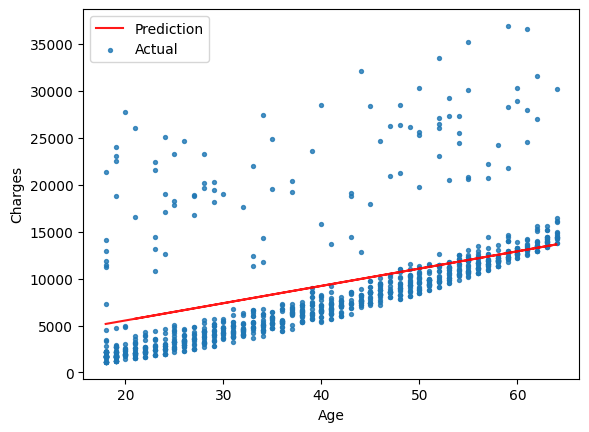

In [47]:
try_parameters(model.coef_ , model.intercept_)

### Machine Learning

Đây là _machine learning model_ đầu tiên.

Machine learning là quá trình tính toán tìm ra các tham số `parameters` để biểu thị mối quan hệ giữa các features và targets

Mỗi ML đều có 3 cấu phần

1. **Model**

2. **Cost Function**

3. **Optimizer**

3 cấu phần này được biểu thị bằng mối quan hệ:

<img src="https://i.imgur.com/oiGQFJ9.png" width="480">

### Hồi quy đơn biến trên `sk-learn`

In [50]:
from sklearn.linear_model import LinearRegression, SGDRegressor

# from sklearn.metrics import root_mean_squared_error as rmse

from sklearn.metrics import mean_squared_error as mse 

def rmse(y_tar, y_pred):
    return np.sqrt(mse(y_tar, y_pred)) 


In [51]:
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

ln = LinearRegression()
sgd = SGDRegressor()

model_ln = ln.fit(inputs, targets)
model_sgd = sgd.fit(inputs, targets)

predictions_ln = model_ln.predict(inputs)
predictions_sgd = model_sgd.predict(inputs)

loss_ln = rmse(targets, predictions_ln)
loss_sgd = rmse(targets, predictions_sgd)

print('Loss of Linear Regression:', loss_ln)
print('Loss of SGD:', loss_sgd)

Loss of Linear Regression: 4662.505766636395
Loss of SGD: 5350.880429433269


### Hồi quy đa biến trên `sk-learn`

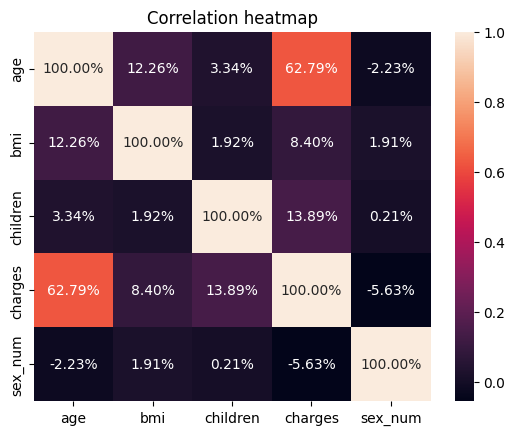

In [52]:
sns.heatmap(non_smoker_df[['age', 'bmi', 'children',  'charges', 'sex_num']].corr()
            , annot=True
            , fmt = '.2%')

plt.title('Correlation heatmap')
plt.show()

Bổ sung thêm các biến bmi và children vào hàm hồi quy được phương trình

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [53]:
inputs, targets = non_smoker_df[['age','bmi', 'children']], non_smoker_df['charges']

ln = LinearRegression()

model_ln = ln.fit(inputs, targets)

predictions_ln = model_ln.predict(inputs)

loss_ln = rmse(targets, predictions_ln)

print('Loss of Linear Regression:', loss_ln)

Loss of Linear Regression: 4608.470405038246


### Triển khai mô hình cho toàn bộ tệp khách hàng

In [54]:
inputs, targets = df[['age','bmi', 'children']], df['charges']

ln = LinearRegression()

model_ln = ln.fit(inputs, targets)

predictions_ln = model_ln.predict(inputs)

loss_ln = rmse(targets, predictions_ln)

print('Loss of Linear Regression:', loss_ln)

Loss of Linear Regression: 11355.317901125973


### Thêm các biến categorical vào ML

In [55]:
inputs, targets = df[['age','bmi', 'children', 'sex_num', 'smoker_num']], df['charges']

ln = LinearRegression()

model_ln = ln.fit(inputs, targets)

predictions_ln = model_ln.predict(inputs)

loss_ln = rmse(targets, predictions_ln)

print('Loss of Linear Regression:', loss_ln)

Loss of Linear Regression: 6056.100708754546


Kết quả đạt loss cao hơn, mô hình tệ hơn

### One-hot Encoding

Cột "region" là cột chứa category cần dược One-hot. Mô tả one-hot như sau:

![](https://i.imgur.com/n8GuiOO.png)

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
encoder = OneHotEncoder()
encoder.fit(df[['region']])
encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [58]:
one_hot = encoder.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [59]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [60]:
inputs, targets = df[['age','bmi', 'children', 'sex_num', 'smoker_num', 'northeast', 'northwest', 'southeast', 'southwest']], df['charges']

ln = LinearRegression()

model_ln = ln.fit(inputs, targets)

predictions_ln = model_ln.predict(inputs)

loss_ln = rmse(targets, predictions_ln)

print('Loss of Linear Regression:', loss_ln)

Loss of Linear Regression: 6041.6796511744515


Model vẫn không có gì khác.

### Model Improvements

#### Features Scailing

In [62]:
weighted_df = pd.DataFrame({
    'feature': ['age','bmi', 'children', 'sex_num', 'smoker_num', 'northeast', 'northwest', 'southeast', 'southwest', 'b']
    ,'weight': np.append(model_ln.coef_, model_ln.intercept_)
})
weighted_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,sex_num,-131.314359
4,smoker_num,23848.534542
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,b,-12525.547811


Có thể thấy: **northest > children > bmi > age**, khác với những gì đã giả định từ trước là age có weight cao nhất

- age chỉ có giá trị từ 18 - 65

- northest chỉ có giá trị binary 0 và 1

Vì vậy, lưu ý rằng: 
1. Không thể sử dụng weight của các cột để nói xem feature nào là quan trọng

2. Cột mà có số lượng range giá trị inputs lớn hơn sẽ có ảnh hưởng không tương xứng tới quá trình tối ưu hóa. Vì mô hình đơn giản nhìn vào `loss` (RMSE) mà `loss` sử dụng inputs, outputs và weight của tất cả các thứ đó

Vì vậy phải scale data thành 1 khoảng giá trị giống nhau (Thuật ngữ là `scale` hoặc `standardize`) với các cột số bằng cách trừ đi `mean` và chia cho `standard deviation (std)`

![](https://i.imgur.com/dT5fLFI.png)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

In [65]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_num', 'smoker_num', 'northeast', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0.0,1.0,0.0,0.0


In [67]:
numeric_cols = ['age', 'bmi','children']
scaler.fit(df[numeric_cols])

StandardScaler()

In [68]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [69]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [70]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [72]:
cat_cols = ['smoker_num', 'sex_num', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [73]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


In [76]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 'b'),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_num,23848.534542
9,b,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_num,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


Sau khi scale, có thể thấy 3 features quan trọng nhất là:

- smoker

- age

- bmi

### Tạo Train - Test

In [77]:
from sklearn.model_selection import train_test_split

In [83]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1, random_state=42)

In [86]:
model = LinearRegression()

model.fit(inputs_train, targets_train)

predictions_test = model.predict(inputs_test)

loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5681.183886386301


In [85]:
predictions_train = model.predict(inputs_train)

loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6082.272151066889


## Revision Questions
1.	Why do we have to perform EDA before fitting a model to the data?
2.	What is a parameter?
3.	What is correlation?
4.	What does negative correlation mean?
5.	How can you find correlation between variables in Python?
6.	What is causation? Explain difference between correlation and causation with an example.
7.	Define Linear Regression.
8.	What is univariate linear regression?
9.	What is multivariate linear regression?
10.	What are weights and bias?
11.	What are inputs and targets?
12.	What is loss/cost function?
13.	What is residual? 
14.	What is RMSE value? When and why do we use it?
15.	What is an Optimizer? What are different types of optimizers? Explain each with an example.
16.	What library is available in Python to perform Linear Regression?
17.	What is <code>sklearn.linear_model </code>?
18.	What does <code>model.fit()</code> do? What arguments must be given?
19.	What does <code>model.predict()</code> do? What arguments must be given?
20.	How do we calculate RMSE values?
21.	What is <code>model.coef_</code>?
22.	What is <code>model.intercept_</code>?
23.	What is SGDRegressor? How is it different from Linear Regression?
24.	Define Machine Learning. What are the main components in Machine Learning?
25.	How does loss value help in determining whether the model is good or not?
26.	What are continuous and categorical variables?
27.	How do we handle categorical variables in Machine Learning? What are the common techniques?
28.	What is feature scaling? How does it help in Machine Learning?
29.	How do we perform scaling in Python?
30.	What is <code>sklearn.preprocessing</code>?
31.	What is a Test set?
32.	How do we split data for model fitting (training and testing) in Python?
33.	How do you approach a Machine Learning problem?

``` Learning sources ```:
1. Notebook: https://jovian.ai/aakashns/python-sklearn-linear-regression
2. StatQuest: https://www.youtube.com/watch?v=xZ_z8KWkhXE 
3. OLS by The Coding Train: https://www.youtube.com/watch?v=szXbuO3bVRk 
4. Gradient Descent: https://www.youtube.com/watch?v=sDv4f4s2SB8  